## Data Science Project 1: Marketing Experiment
This project is to analyze our e-commerce website UI experiment

## 1. Read the Data

In [1]:
import pandas as pd
from scipy import stats # stats用来做t-test非常powerful
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [2]:
# read data from csv files
experiment = pd.read_csv("experiment.csv") # experiment data
users = pd.read_csv("users.csv") # customers data

In [3]:
# check what the data look like
experiment.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1


In [4]:
users.tail()

,user_id,sex,age,state
452780,106844,Female,21,New York
452781,907214,Male,22,Florida
452782,234616,Female,20,Airzona
452783,168038,Female,22,Florida
452784,954132,Male,18,California


In [5]:
print(users.shape)
print(experiment.shape)
# check duplicate records in experiment and users tables
print(users['user_id'].nunique())
print(experiment['user_id'].nunique())

(452785, 4)
(453269, 9)
452785
453269


In [6]:
# join two data
df = experiment.merge(users, on=['user_id']) #第二种写法: pd.merge(experiment, users, on=['user_id'])
df.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0,Female,18,Texas
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0,Male,28,Massachusetts
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0,Female,24,California
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0,Male,34,Michigan
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1,Female,18,California


In [7]:
df.describe() #返回所有numerial columns的性质

,user_id,conversion,condition,age
count,452733.000000,452733.000000,452733.000000,452733.000000
mean,499947.117970,0.049552,0.476484,27.130810
std,288678.018612,0.217019,0.499447,6.776542
min,1.000000,0.000000,0.000000,18.000000
25%,249831.000000,0.000000,0.000000,22.000000
50%,500014.000000,0.000000,0.000000,26.000000
75%,749541.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [8]:
df.info() # same as above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452733 entries, 0 to 452732
Data columns (total 12 columns):
user_id       452733 non-null int64
date          452733 non-null object
interface     452733 non-null object
language      452733 non-null object
channel       452733 non-null object
ads           181640 non-null object
device        452733 non-null object
conversion    452733 non-null int64
condition     452733 non-null int64
sex           452733 non-null object
age           452733 non-null int64
state         452733 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [9]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.describe(include='all')

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
count,452733.000000,452733,452733,452733,452733,181640,452733,452733.000000,452733.000000,452733,452733.000000,452733
unique,NaN,5,2,3,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2019-12-04 00:00:00,app,English,Ads,Google,Sumsung,NaN,NaN,Male,NaN,California
freq,NaN,140982,251242,377048,181640,68339,154933,NaN,NaN,226380,NaN,128444
first,NaN,2019-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499947.117970,NaN,NaN,NaN,NaN,NaN,NaN,0.049552,0.476484,NaN,27.130810,NaN
std,288678.018612,NaN,NaN,NaN,NaN,NaN,NaN,0.217019,0.499447,NaN,6.776542,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249831.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN


## 2. EAD (Exploratory Data Analysis)

In [10]:
# control conversion rate by device types
df.loc[df.condition==0].groupby('device')['conversion'].mean() # another way: df.query('condition==0')

device
GooglePixel    0.054511
Huawei         0.054586
Oppo           0.056981
Sumsung        0.055985
Xiaomi         0.057170
iPad           0.052804
iPhone         0.054575
Name: conversion, dtype: float64

In [41]:
# test conversion rate by state, sort descending
# df.loc[df.condition==1].groupby('state')['conversion'].mean().sort_values(ascending=False)
df.query('condition==1').groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Washington        0.054779
Texas             0.054210
New Jersey        0.051305
California        0.051183
Florida           0.050590
Michigan          0.050557
Tennessee         0.049370
Ohio              0.049229
New York          0.048997
Illinois          0.048995
Virginia          0.048654
Massachusetts     0.047947
Georgia           0.047918
Airzona           0.047551
North Carolina    0.013727
Indiana           0.012917
Name: conversion, dtype: float64

In [42]:
# control conversion rate by state, sort descending
# df.loc[df.condition==0].groupby('state')['conversion'].mean().sort_values(ascending=False)
df.query('condition==0').groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Massachusetts     0.053567
Texas             0.052678
Washington        0.052256
Florida           0.052056
Airzona           0.050906
Virginia          0.050545
New York          0.050356
Michigan          0.049929
California        0.049498
Georgia           0.049405
Illinois          0.049154
Ohio              0.048493
New Jersey        0.048132
Tennessee         0.046796
North Carolina    0.015079
Indiana           0.012048
Name: conversion, dtype: float64

From the data, PA has the highest conversion rate in control group, but not existing in test group. The experiment has some issue as it didn't test one of the key states. In the following analysis, we will exclude PA. We should investigate on why PA is missing from the test group.

## 3. Preliminary t-test
We want to make sure that we have enough samples in both test and control before we conduct a preliminary t-test.

In [13]:
df.loc[df.state!='Pennsylvania'].groupby('condition').count()

,user_id,date,interface,language,channel,ads,device,conversion,sex,age,state
condition,,,,,,,,,,,
0,185253,185253,185253,185253,185253,74329,185253,185253,185253,185253,185253
1,215720,215720,215720,215720,215720,86428,215720,215720,215720,215720,215720


In [14]:
# Pennsylvania only has users in control and exclude them from data
df = df.loc[df.state != 'Pennsylvania']
# t-test of control vs. test for conversion rate
test = stats.ttest_ind(df[df.condition==1]['conversion'], df[df.condition==0]['conversion'], equal_var=False) # 2 independent samples
test

Ttest_indResult(statistic=-7.348809649672405, pvalue=2.0037258144272322e-13)

In [15]:
print("The preliminary t-test p-value is:", test.pvalue, "; and t-statistic is: ", test.statistic)

The preliminary t-test p-value is: 2.0037258144272322e-13 ; and t-statistic is:  -7.348809649672405


In [16]:
df.groupby('condition')['conversion'].mean() # 新的UI可能大家并不喜欢，因为test rate为0.43413，同时也并不能提高转化率

condition
0    0.048291
1    0.043413
Name: conversion, dtype: float64

Preliminary t-test shows that the new UI (test) has a stats-sig (statisticaly significant, SS) regression/decrease in conversion rate than the old UI (control). Control users convert at the rate of 4.8% while test users convert at the rate of 4.3%. (9%-10% relative delta - drop)
 
There are a couple of hypotheses we can think of:  
1) New UI is really worse  
2) There is more bias/error/problem associated with the experiment data  
3) We didn't collect enough data in some segments  

We will continue to investigate on the experiment data to see if the users in test and control groups are randomly sampled with any bias, and sufficient data in necessary segments before deriving any conlusions about the t-test results. Only after we exclude hypothesis 2) and 3), we can take hypothesis 1) and have learnings about future UI design and product from this experiment.

## 4. Examine Bias in the Experiment
### 4.1 By Time

In [17]:
# Let's check # of samples and conversion rate between treatment and control day by day.
# To see if there is any weirdness in some days, by comparing # of samples and conversion rate between test and control day by day.

temp = df.groupby(['date', 'condition'])['user_id'].count()

In [18]:
temp.unstack()

condition,0,1
date,,
2019-11-30,28971,33834
2019-12-01,28991,33833
2019-12-02,28899,33507
2019-12-03,40709,47371
2019-12-04,57683,67175


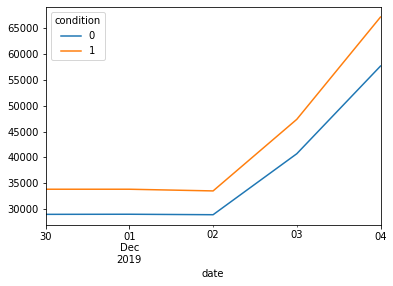

In [19]:
temp.unstack().plot() # or直接: df.groupby(['date', 'condition'])['user_id'].count().unstack().plot()

In [20]:
df.groupby('date')['conversion'].agg(ratio = lambda a: a[df.condition == 1].mean()/a[df.condition == 0].mean())
#只要group by一个column就不用方括号

,ratio
date,
2019-11-30,0.858002
2019-12-01,0.894586
2019-12-02,0.911110
2019-12-03,0.891067
2019-12-04,0.923195


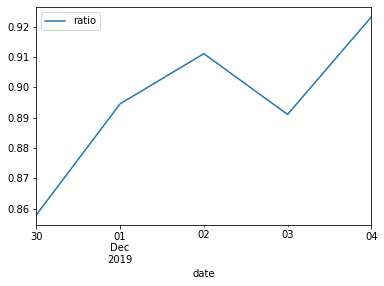

In [21]:
df.groupby('date')['conversion'].agg(ratio = lambda a: a[df.condition == 1].mean()/a[df.condition == 0].mean()).plot()

- Treatment group is consistently worse than control group over 5 days.
- The experiment hasn't ran for 1-2 weeks to capture weekly pattern because 12/03-04 have more traffic than first 3 days, probably due to weekly pattern. There is some limitation about this data.

### 4.2 By Device

In [22]:
device_count = df.groupby('device')['condition'].agg(count_treatment=lambda a: len(a[a==1]), count_control=lambda a: len(a[a==0]))
#为什么a==1和a==0，因为上头输入的condition

In [23]:
device_count*100.0/device_count.sum()

,count_treatment,count_control
device,,
GooglePixel,10.263768,10.308605
Huawei,13.541628,13.696944
Oppo,8.971352,8.973134
Sumsung,34.345448,34.130082
Xiaomi,1.336455,1.346267
iPad,8.946319,9.218744
iPhone,22.595031,22.326224


- Treatment and control are well balanced across device type, no bias in device.

## 5. Use Machine Learning to Automate the Experiment Data Quality Check

- supervised learning
- label - condition (being in treatment or control); or label - conversion or not
- features = other factors (excluding conversion)

Because we have categorical and continuoous variables, we'll use decision tree for a quick check/understanding.

In [24]:
pd.get_dummies(df)

,user_id,date,conversion,condition,age,interface_app,interface_browser,language_Chinese,language_English,language_Others,...,state_Massachusetts,state_Michigan,state_New Jersey,state_New York,state_North Carolina,state_Ohio,state_Tennessee,state_Texas,state_Virginia,state_Washington
0,435134,2019-11-30,0,0,18,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,310928,2019-12-04,0,0,28,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,836325,2019-11-30,0,0,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,298244,2019-12-04,0,0,34,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,614947,2019-12-04,0,1,18,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452725,330151,2019-12-01,0,1,21,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
452726,380950,2019-11-30,1,0,23,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
452727,853589,2019-12-03,0,1,50,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
452730,310774,2019-12-01,0,0,37,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_dt = df.copy()
df_dt = df_dt.drop(['user_id', 'conversion', 'condition'], axis=1)
df_dt['date'] = df_dt['date'].apply(str) #apply(str)是对column里的每一个值进行string的转化
y = df['condition'] #y为label
df_dt = pd.get_dummies(df_dt)

In [26]:
df_dt

,age,date_2019-11-30 00:00:00,date_2019-12-01 00:00:00,date_2019-12-02 00:00:00,date_2019-12-03 00:00:00,date_2019-12-04 00:00:00,interface_app,interface_browser,language_Chinese,language_English,...,state_Massachusetts,state_Michigan,state_New Jersey,state_New York,state_North Carolina,state_Ohio,state_Tennessee,state_Texas,state_Virginia,state_Washington
0,18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,28,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,24,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,34,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,18,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452725,21,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
452726,23,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
452727,50,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
452730,37,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

In [28]:
dt.fit(df_dt, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
export_graphviz(dt, out_file='dt_plot.dot', feature_names=df_dt.columns, proportion=True)

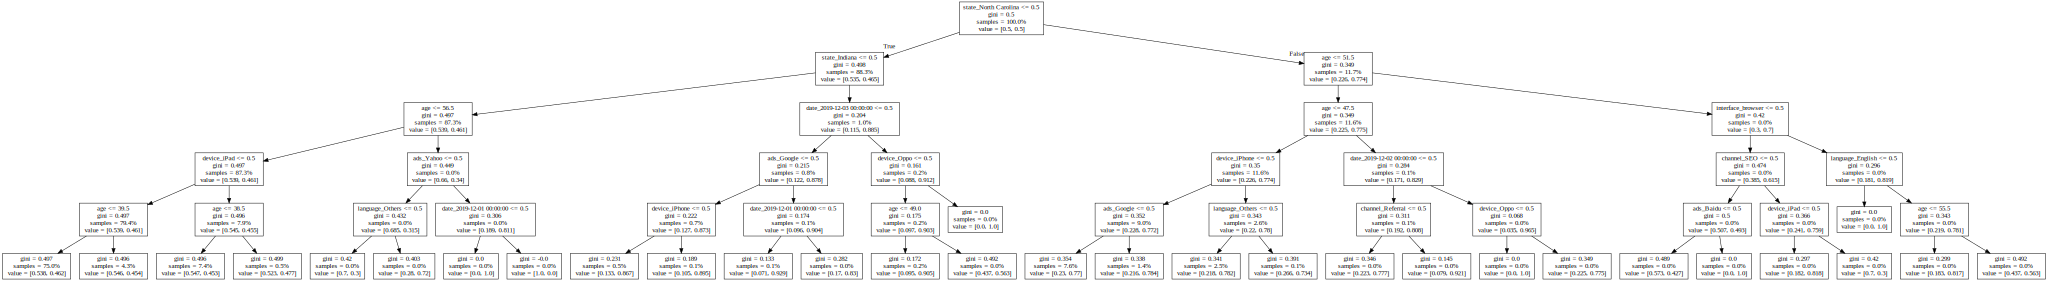

In [30]:
graphviz.Source.from_file('dt_plot.dot') #value左边是control,右边test

In [31]:
df.loc[df.state == 'North Carolina', 'condition'].mean()

0.7998630224942748

In [32]:
df.loc[df.state == 'Indiana', 'condition'].mean()

0.8995400629387558

In [33]:
df.loc[df.state == 'Indiana', 'conversion'].mean()

0.012829823287339627

In [34]:
df.loc[df.state == 'North Carolina', 'conversion'].mean()

0.013997388866297113

North Carolina and Indiana are the two states with extremely low conversion rate and higher likelihood to be in the
treatment group. North Carolina has 78% users in test and its average conversin rate is -1%; Indiana has 89% users
in test and its average conversion rate is -1%.

Follow-ups:
- Investigate our experiment design and randomization logic, esp. allocation by state
- Remove PA, NC, IN from data and re-conduct t-test
- NC, IN: separate t-test
- t-test by each state

In [35]:
df2 = df.loc[~df.state.isin(['North Carolina', 'Indiana'])] #上面follow up第二点，～表示not in
df3 = df.loc[df.state.isin(['North Carolina', 'Indiana'])] #上面follow up第三点

In [36]:
df2.state.unique()

array(['Texas', 'Massachusetts', 'California', 'Michigan', 'Florida',
       'New Jersey', 'Illinois', 'New York', 'Virginia', 'Airzona',
       'Ohio', 'Tennessee', 'Georgia', 'Washington'], dtype=object)

In [37]:
df3.state.unique()

array(['North Carolina', 'Indiana'], dtype=object)

In [38]:
stats.ttest_ind(df2.loc[df2['condition']==1, 'conversion'], df2.loc[df2['condition']==0, 'conversion'], equal_var=False)

Ttest_indResult(statistic=0.36340782173835057, pvalue=0.7163004791299912)

In [39]:
stats.ttest_ind(df3.loc[df3['condition']==1, 'conversion'], df3.loc[df3['condition']==0, 'conversion'], equal_var=False)

Ttest_indResult(statistic=-0.956655241615398, pvalue=0.3387574569723738)

In [40]:
df.groupby('state')['conversion'].agg(conversion_rate_treatment = lambda a: a[df.condition==1].mean(),
                                        conversion_rate_control = lambda a: a[df.condition==0].mean(),
                                        sample_count_treatment = lambda a: a[df.condition==1].count(),
                                        sample_count_control = lambda a: a[df.condition==0].count(),
                                        p_value = lambda a: stats.ttest_ind(a[df.condition==1], a[df.condition==0], equal_var=False).pvalue)

,conversion_rate_treatment,conversion_rate_control,sample_count_treatment,sample_count_control,p_value
state,,,,,
Airzona,0.047551,0.050906,4206,4361,0.473003
California,0.051183,0.049498,64260,64184,0.167446
Florida,0.050590,0.052056,26962,27086,0.439732
Georgia,0.047918,0.049405,5572,5546,0.715656
Illinois,0.048995,0.049154,7858,8036,0.962964
Indiana,0.012917,0.012048,3716,415,0.878326
Massachusetts,0.047947,0.053567,4067,4107,0.247087
Michigan,0.050557,0.049929,16793,16864,0.792034
New Jersey,0.051305,0.048132,9882,9848,0.305148


## 6. Decision Making

After we control the experiment result by state, the new UI vs. the old UI are not statistically significantlly different from each other, with respect to conversion rate.

There are a couple of follow-up investigation needed:
- The experiment is not well designed, without enough time window to collect weekly patterns.
- There is something wrong with the randomization. We need to check the randomization code logic, and the data collection pipeline. Find the SDE/DE/DS in charge of this.
- The current conslusion on NC and IN are still problematic, given its highly skewed data samples in test. We can 1) examine if the randomization is done right for the two states; 2) if yes, then we can try rebalance the data with adjustments or propensity score matching, and re-do the t-test on balanced data for NC/IN.
- We don't have treatment data for PA, and PA is one of the key states in our customer base. We need to redo the experiment in a correct way for PA.
- Since the nre UI and the old UI don't make any difference by state, we need to make the business decision based on other considerations, i.e. cost of replacement, code base maintenance, long-term consideration such acquisition, branding.